# References

- https://stackabuse.com/python-for-nlp-tokenization-stemming-and-lemmatization-with-spacy-library
- https://www.tutorialspoint.com/gensim/gensim_creating_a_dictionary.htm
- https://github.com/fiyero/LDA_gensim
- https://github.com/fiyero/LDA_gensim/blob/master/LDA%20with%20Gensim_git.ipynb

## Raw Data Prep

In [1]:
from utils import *
from pprint import pprint

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

config = get_config('config.yaml')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\enlik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df2 = read_csv_from_gdrive(config['csv_input']['bolt_apple'])
total_reviews = len(df2)
unique_users  = len(df2['userName'].unique())
mean = df2['rating'].mean()

print(f'Total English reviews: {total_reviews} \n')
print(f'Total unique users : {unique_users}')
print(f'Total users who gave multiple reviews: {total_reviews - unique_users}\n')
print(f'Average rating for this app based on the textual reviews: {round(mean,2)} \n')

Total English reviews: 3154 

Total unique users : 3149
Total users who gave multiple reviews: 5

Average rating for this app based on the textual reviews: 3.02 



In [7]:
apple = df2.review.astype(str)
apple = apple.reset_index(drop=True)
apple

0       I love bolt. I don’t use uber often because on...
1       So annoyed with this app!! Definitely the wors...
2       I’ve been using bolt for a month now. I had a ...
3       To make things clear, I am not a regular revie...
4       I have used the app 3 or 4 times and I thought...
                              ...                        
3149    Зачем регестрироваться? Я просто хочу посмотре...
3150                                                   :)
3151    Слишком мало машин, иногда нет вообще, часто п...
3152    1. samm: positsioneerime telefoni\n2. samm: "V...
3153    Taxify's purpose was that you can CHOOSE your ...
Name: review, Length: 3154, dtype: object

## Removing Stop Words

In [61]:
doc = apple[0]
doc

'I love bolt. I don’t use uber often because one ride even if it’s short is like £11. Whereas from my high street to my house is £3. Not only that but their drivers are SUPER friendly! I was sick one day (my first time using bolt) and the driver was so understanding and encouraged me throughout my journey. Bolt is 100% recommended by me. I don’t write reviews so that’s how you know I defiantly recommend it. My Instagram name is: TeeKezi if you wish to get in contact with me about bolt. I’m not an ambassador 😂 or anything like that. Just super happy with the service I have been receiving x'

In [12]:
stop_words = stopwords.words('english')
stop_words.extend(['bolt','taxify','uber','blablacar'])

In [17]:
[word for word in simple_preprocess(str(doc)) if word not in stop_words]

['love',
 'use',
 'often',
 'one',
 'ride',
 'even',
 'short',
 'like',
 'whereas',
 'high',
 'street',
 'house',
 'drivers',
 'super',
 'friendly',
 'sick',
 'one',
 'day',
 'first',
 'time',
 'using',
 'driver',
 'understanding',
 'encouraged',
 'throughout',
 'journey',
 'recommended',
 'write',
 'reviews',
 'know',
 'defiantly',
 'recommend',
 'instagram',
 'name',
 'teekezi',
 'wish',
 'get',
 'contact',
 'ambassador',
 'anything',
 'like',
 'super',
 'happy',
 'service',
 'receiving']

## Removing Punctuations

In [19]:
doc = apple[0]
doc

'I love bolt. I don’t use uber often because one ride even if it’s short is like £11. Whereas from my high street to my house is £3. Not only that but their drivers are SUPER friendly! I was sick one day (my first time using bolt) and the driver was so understanding and encouraged me throughout my journey. Bolt is 100% recommended by me. I don’t write reviews so that’s how you know I defiantly recommend it. My Instagram name is: TeeKezi if you wish to get in contact with me about bolt. I’m not an ambassador 😂 or anything like that. Just super happy with the service I have been receiving x'

In [18]:
re.sub('[%s]' % re.escape(string.punctuation), ' ', doc)

'I love bolt  I don’t use uber often because one ride even if it’s short is like £11  Whereas from my high street to my house is £3  Not only that but their drivers are SUPER friendly  I was sick one day  my first time using bolt  and the driver was so understanding and encouraged me throughout my journey  Bolt is 100  recommended by me  I don’t write reviews so that’s how you know I defiantly recommend it  My Instagram name is  TeeKezi if you wish to get in contact with me about bolt  I’m not an ambassador 😂 or anything like that  Just super happy with the service I have been receiving x'

## Stemming The Words

In [20]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [21]:
stemming = PorterStemmer()

In [25]:
list_of_words = [word for word in simple_preprocess(str(doc)) if word not in stop_words]

In [26]:
for x in list_of_words:
    print(x, ' : ', stemming.stem(x))

love  :  love
use  :  use
often  :  often
one  :  one
ride  :  ride
even  :  even
short  :  short
like  :  like
whereas  :  wherea
high  :  high
street  :  street
house  :  hous
drivers  :  driver
super  :  super
friendly  :  friendli
sick  :  sick
one  :  one
day  :  day
first  :  first
time  :  time
using  :  use
driver  :  driver
understanding  :  understand
encouraged  :  encourag
throughout  :  throughout
journey  :  journey
recommended  :  recommend
write  :  write
reviews  :  review
know  :  know
defiantly  :  defiantli
recommend  :  recommend
instagram  :  instagram
name  :  name
teekezi  :  teekezi
wish  :  wish
get  :  get
contact  :  contact
ambassador  :  ambassador
anything  :  anyth
like  :  like
super  :  super
happy  :  happi
service  :  servic
receiving  :  receiv


## Lemmatization

### Using NLTK

In [28]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\enlik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
lemmatizer = WordNetLemmatizer()

In [30]:
list_of_words = [word for word in simple_preprocess(str(doc)) if word not in stop_words]

In [32]:
for x in list_of_words:
    print(x, ' : ', lemmatizer.lemmatize(x))

love  :  love
use  :  use
often  :  often
one  :  one
ride  :  ride
even  :  even
short  :  short
like  :  like
whereas  :  whereas
high  :  high
street  :  street
house  :  house
drivers  :  driver
super  :  super
friendly  :  friendly
sick  :  sick
one  :  one
day  :  day
first  :  first
time  :  time
using  :  using
driver  :  driver
understanding  :  understanding
encouraged  :  encouraged
throughout  :  throughout
journey  :  journey
recommended  :  recommended
write  :  write
reviews  :  review
know  :  know
defiantly  :  defiantly
recommend  :  recommend
instagram  :  instagram
name  :  name
teekezi  :  teekezi
wish  :  wish
get  :  get
contact  :  contact
ambassador  :  ambassador
anything  :  anything
like  :  like
super  :  super
happy  :  happy
service  :  service
receiving  :  receiving


### Using Spacy

In [62]:
doc

'I love bolt. I don’t use uber often because one ride even if it’s short is like £11. Whereas from my high street to my house is £3. Not only that but their drivers are SUPER friendly! I was sick one day (my first time using bolt) and the driver was so understanding and encouraged me throughout my journey. Bolt is 100% recommended by me. I don’t write reviews so that’s how you know I defiantly recommend it. My Instagram name is: TeeKezi if you wish to get in contact with me about bolt. I’m not an ambassador 😂 or anything like that. Just super happy with the service I have been receiving x'

In [64]:
import spacy

sp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# spacy_doc = sp('testing the best game ever that I ever played')
spacy_doc = sp(doc)
print (" ".join([token.lemma_ for token in spacy_doc]))

-PRON- love bolt . -PRON- do not use uber often because one ride even if -PRON- ’ short be like £ 11 . whereas from -PRON- high street to -PRON- house be £ 3 . not only that but -PRON- driver be super friendly ! -PRON- be sick one day ( -PRON- first time use bolt ) and the driver be so understanding and encourage -PRON- throughout -PRON- journey . Bolt be 100 % recommend by -PRON- . -PRON- do not write review so that ’ how -PRON- know -PRON- defiantly recommend -PRON- . -PRON- Instagram name be : TeeKezi if -PRON- wish to get in contact with -PRON- about bolt . -PRON- be not an ambassador 😂 or anything like that . just super happy with the service -PRON- have be receive x


In [65]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
test_doc = nlp('did displaying words')
print (" ".join([token.lemma_ for token in test_doc]))

do display word


## Building Corpus using gensim

### Using utils.py

In [68]:
import gensim
from gensim import corpora

In [66]:
cleaned_docs = remove_things(apple)
lists_of_words = list(sentences_to_words(cleaned_docs))
lists_of_words_no_stops = remove_stopwords(lists_of_words)
ngrams = make_bigrams(lists_of_words_no_stops)
data_lemmatized = lemmatize(ngrams, allowed_postags=['NOUN'])

Making bigrams...
Lemmatizing...


In [67]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
corpus  = [id2word.doc2bow(text) for text in data_lemmatized]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]]


In [70]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ambassador', 1),
  ('contact', 1),
  ('day', 1),
  ('driver', 2),
  ('journey', 1),
  ('love', 1),
  ('review', 1),
  ('ride', 1),
  ('understanding', 1),
  ('use', 1),
  ('write', 1)]]

### Creating Dictionary using Gensim

In [71]:
import gensim
from gensim import corpora
from pprint import pprint

In [78]:
doc = [
   "CNTK formerly known as Computational Network Toolkit",
   "is a free easy-to-use open-source commercial-grade toolkit",
   "that enable us to train deep learning algorithms to learn like the human brain."
]

text_tokens = [[text for text in doc.split()] for doc in doc]
text_tokens

[['CNTK', 'formerly', 'known', 'as', 'Computational', 'Network', 'Toolkit'],
 ['is',
  'a',
  'free',
  'easy-to-use',
  'open-source',
  'commercial-grade',
  'toolkit'],
 ['that',
  'enable',
  'us',
  'to',
  'train',
  'deep',
  'learning',
  'algorithms',
  'to',
  'learn',
  'like',
  'the',
  'human',
  'brain.']]

In [75]:
dict_LoS = corpora.Dictionary(text_tokens)
print(dict_LoS)

Dictionary(27 unique tokens: ['CNTK', 'Computational', 'Network', 'Toolkit', 'as']...)


In [77]:
print(dict_LoS.token2id)

{'CNTK': 0, 'Computational': 1, 'Network': 2, 'Toolkit': 3, 'as': 4, 'formerly': 5, 'known': 6, 'a': 7, 'commercial-grade': 8, 'easy-to-use': 9, 'free': 10, 'is': 11, 'open-source': 12, 'toolkit': 13, 'algorithms': 14, 'brain.': 15, 'deep': 16, 'enable': 17, 'human': 18, 'learn': 19, 'learning': 20, 'like': 21, 'that': 22, 'the': 23, 'to': 24, 'train': 25, 'us': 26}


### Creating BoW Corpus

In [80]:
import gensim
import pprint
from gensim import corpora
from gensim.utils import simple_preprocess
doc_list = [
   "Hello, how are you?", "How do you do?", 
   "Hey what are you doing? yes you What are you doing?"
]
doc_tokenized = [simple_preprocess(doc) for doc in doc_list]
dictionary = corpora.Dictionary()
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]
print(BoW_corpus)
id_words = [[(dictionary[id], count) for id, count in line] for line in BoW_corpus]
print(id_words)

[[(0, 1), (1, 1), (2, 1), (3, 1)], [(2, 1), (3, 1), (4, 2)], [(0, 2), (3, 3), (5, 2), (6, 1), (7, 2), (8, 1)]]
[[('are', 1), ('hello', 1), ('how', 1), ('you', 1)], [('how', 1), ('you', 1), ('do', 2)], [('are', 2), ('you', 3), ('doing', 2), ('hey', 1), ('what', 2), ('yes', 1)]]


### (Optional) Get the TF-IDF Corpus Form

In [86]:
BoW_corpus

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(2, 1), (3, 1), (4, 2)],
 [(0, 2), (3, 3), (5, 2), (6, 1), (7, 2), (8, 1)]]

In [87]:
tfidf = gensim.models.TfidfModel(BoW_corpus)
corpus_tfidf = tfidf[BoW_corpus]

In [91]:
lda_model = gensim.models.LdaMulticore(BoW_corpus, 
                                       num_topics=10, 
                                       id2word = id2word, 
                                       passes = 2, 
                                       workers=2)


In [92]:
for idx, topic in lda_model.print_topics():
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.000*"driver" + 0.000*"ambassador" + 0.000*"journey" + 0.000*"day" + 0.000*"love" + 0.000*"contact" + 0.000*"ride" + 0.000*"review" + 0.000*"understanding" + 0.000*"equation"
Topic: 1 
Words: 0.000*"journey" + 0.000*"driver" + 0.000*"day" + 0.000*"ambassador" + 0.000*"contact" + 0.000*"love" + 0.000*"ride" + 0.000*"review" + 0.000*"understanding" + 0.000*"equation"
Topic: 2 
Words: 0.000*"driver" + 0.000*"ambassador" + 0.000*"journey" + 0.000*"day" + 0.000*"contact" + 0.000*"love" + 0.000*"ride" + 0.000*"review" + 0.000*"understanding" + 0.000*"equation"
Topic: 3 
Words: 0.000*"driver" + 0.000*"journey" + 0.000*"ambassador" + 0.000*"day" + 0.000*"contact" + 0.000*"love" + 0.000*"ride" + 0.000*"review" + 0.000*"understanding" + 0.000*"equation"
Topic: 4 
Words: 0.007*"driver" + 0.007*"day" + 0.007*"journey" + 0.004*"contact" + 0.004*"ambassador" + 0.000*"love" + 0.000*"ride" + 0.000*"review" + 0.000*"understanding" + 0.000*"equation"
Topic: 5 
Words: 0.000*"driver" + 0

### Example from https://github.com/fiyero/LDA_gensim/blob/master/LDA%20with%20Gensim_git.ipynb

In [96]:
import pandas as pd
data = pd.read_csv('datasets/abcnews-date-text.csv', error_bad_lines=False)

data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [102]:
data_text = data[:300000][['headline_text']]

data_text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [103]:
data_text['index'] = data_text.index

documents = data_text
documents.head()

,headline_text,index
0,aba decides against community broadcasting lic...,0
1,act fire witnesses must be aware of defamation,1
2,a g calls for infrastructure protection summit,2
3,air nz staff in aust strike for pay rise,3
4,air nz strike to affect australian travellers,4


In [110]:
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem.porter import *
import numpy as np

import nltk
nltk.download('wordnet')

stemmer = PorterStemmer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\enlik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [111]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in stopwords.words('english') and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


In [112]:
document_num = 4310
doc_sample = documents[documents['index'] == document_num].values[0][0]

print("Original document: ")
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print("\n\nTokenized and lemmatized document: ")
print(preprocess(doc_sample))


Original document: 
['ratepayers', 'group', 'wants', 'compulsory', 'local', 'govt', 'voting']


Tokenized and lemmatized document: 
['ratepay', 'group', 'want', 'compulsori', 'local', 'govt', 'vote']


In [113]:
processed_docs = documents['headline_text'].map(preprocess)
processed_docs[:10]

0                   [decid, commun, broadcast, licenc]
1                       [fire, wit, must, awar, defam]
2               [call, infrastructur, protect, summit]
3                          [staff, aust, strike, rise]
4                 [strike, affect, australian, travel]
5                   [ambiti, olsson, win, tripl, jump]
6               [antic, delight, record, break, barca]
7    [aussi, qualifi, stosur, wast, four, memphi, m...
8                [aust, address, secur, council, iraq]
9                             [australia, lock, timet]
Name: headline_text, dtype: object

In [114]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.items():
    print(k, v)
    count += 1
    if count > 10:
        break


0 broadcast
1 commun
2 decid
3 licenc
4 awar
5 defam
6 fire
7 must
8 wit
9 call
10 infrastructur


In [115]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)


In [116]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_doc_4310 = bow_corpus[document_num]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))


Word 159 ("govt") appears 1 time.
Word 238 ("group") appears 1 time.
Word 287 ("vote") appears 1 time.
Word 578 ("local") appears 1 time.
Word 827 ("want") appears 1 time.
Word 3230 ("compulsori") appears 1 time.
Word 3231 ("ratepay") appears 1 time.


In [118]:
tfidf = gensim.models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [119]:
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.5971141346931055), (1, 0.3879165862525364), (2, 0.4862366442503009), (3, 0.5065070167807045)]


In [120]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics=10, 
                                       id2word = dictionary, 
                                       passes = 2, 
                                       workers=2)

In [121]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")


Topic: 0 
Words: 0.025*"closer" + 0.023*"power" + 0.018*"deal" + 0.018*"rule" + 0.013*"blaze" + 0.013*"firefight" + 0.012*"compani" + 0.012*"suspect" + 0.011*"move" + 0.011*"blue"


Topic: 1 
Words: 0.024*"help" + 0.021*"fire" + 0.013*"break" + 0.013*"north" + 0.012*"rain" + 0.012*"drought" + 0.011*"protest" + 0.011*"polic" + 0.010*"storm" + 0.010*"hous"


Topic: 2 
Words: 0.030*"warn" + 0.023*"road" + 0.022*"concern" + 0.022*"crash" + 0.018*"fear" + 0.017*"death" + 0.017*"australia" + 0.016*"polic" + 0.016*"driver" + 0.015*"play"


Topic: 3 
Words: 0.022*"boost" + 0.019*"chang" + 0.017*"worker" + 0.017*"work" + 0.017*"make" + 0.015*"fund" + 0.015*"industri" + 0.014*"govt" + 0.013*"union" + 0.010*"farm"


Topic: 4 
Words: 0.043*"govt" + 0.038*"water" + 0.023*"urg" + 0.021*"plan" + 0.019*"group" + 0.016*"health" + 0.015*"nation" + 0.013*"fund" + 0.013*"call" + 0.012*"say"


Topic: 5 
Words: 0.041*"polic" + 0.033*"charg" + 0.028*"court" + 0.027*"face" + 0.023*"find" + 0.020*"miss" + 0.02

In [122]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.27022512018337325


In [123]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -6.81466980651183


In [124]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [125]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=2, limit=40, step=6)

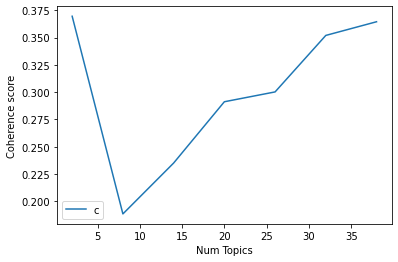

In [126]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [127]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, 
                                             num_topics=10, 
                                             id2word = dictionary, 
                                             passes = 2, 
                                             workers=4)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.011*"nuclear" + 0.008*"timor" + 0.007*"iran" + 0.007*"doubt" + 0.006*"korea" + 0.006*"say" + 0.006*"talk" + 0.006*"teacher" + 0.005*"downer" + 0.005*"dump"


Topic: 1 Word: 0.021*"polic" + 0.019*"crash" + 0.017*"kill" + 0.013*"miss" + 0.012*"charg" + 0.011*"search" + 0.010*"find" + 0.010*"investig" + 0.010*"die" + 0.009*"woman"


Topic: 2 Word: 0.014*"govt" + 0.011*"water" + 0.010*"fund" + 0.010*"health" + 0.008*"urg" + 0.008*"plan" + 0.008*"council" + 0.008*"servic" + 0.007*"boost" + 0.007*"fire"


Topic: 3 Word: 0.007*"israel" + 0.007*"troop" + 0.007*"isra" + 0.007*"drink" + 0.006*"palestinian" + 0.006*"refus" + 0.006*"bail" + 0.005*"mill" + 0.005*"kill" + 0.005*"strike"


Topic: 4 Word: 0.008*"final" + 0.007*"clean" + 0.006*"whale" + 0.005*"bull" + 0.005*"sailor" + 0.004*"speed" + 0.004*"hewitt" + 0.004*"japanes" + 0.004*"cruis" + 0.004*"spot"


Topic: 5 Word: 0.031*"closer" + 0.006*"titl" + 0.006*"climat" + 0.006*"lead" + 0.006*"uranium" + 0.006*"lebanon" + 0.006*"

In [128]:
from gensim.models import CoherenceModel

coherence_model_lda_idf = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_model_lda_idf = coherence_model_lda_idf.get_coherence()
print('\nCoherence Score: ', coherence_model_lda_idf)


Coherence Score:  0.3583451324456751


In [129]:
#original Text of sample document 4310
processed_docs[document_num]

['ratepay', 'group', 'want', 'compulsori', 'local', 'govt', 'vote']

In [130]:
for index, score in sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True):
    print("\nScore: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))


Score: 0.5201311707496643	 Topic: 0.043*"govt" + 0.038*"water" + 0.023*"urg" + 0.021*"plan" + 0.019*"group"

Score: 0.3798331320285797	 Topic: 0.022*"rise" + 0.018*"continu" + 0.017*"price" + 0.016*"high" + 0.012*"fight"

Score: 0.012510480359196663	 Topic: 0.047*"council" + 0.024*"claim" + 0.022*"investig" + 0.019*"reject" + 0.017*"polic"

Score: 0.012505877763032913	 Topic: 0.017*"howard" + 0.014*"leader" + 0.014*"begin" + 0.014*"talk" + 0.013*"sale"

Score: 0.01250541303306818	 Topic: 0.022*"boost" + 0.019*"chang" + 0.017*"worker" + 0.017*"work" + 0.017*"make"

Score: 0.012503890320658684	 Topic: 0.037*"kill" + 0.025*"iraq" + 0.023*"open" + 0.020*"forc" + 0.018*"elect"

Score: 0.012503398582339287	 Topic: 0.025*"closer" + 0.023*"power" + 0.018*"deal" + 0.018*"rule" + 0.013*"blaze"

Score: 0.012502227909862995	 Topic: 0.030*"warn" + 0.023*"road" + 0.022*"concern" + 0.022*"crash" + 0.018*"fear"

Score: 0.012502209283411503	 Topic: 0.041*"polic" + 0.033*"charg" + 0.028*"court" + 0.027

In [131]:
lda_model[bow_corpus[document_num]]

[(0, 0.0125033995),
 (1, 0.012502208),
 (2, 0.012502229),
 (3, 0.012505413),
 (4, 0.52013195),
 (5, 0.01250221),
 (6, 0.012510644),
 (7, 0.012505879),
 (8, 0.37983218),
 (9, 0.012503891)]

In [132]:
sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True)

[(4, 0.5201361),
 (8, 0.3798252),
 (6, 0.012513381),
 (7, 0.012505882),
 (3, 0.012505417),
 (9, 0.012503895),
 (0, 0.012503402),
 (2, 0.01250223),
 (5, 0.012502211),
 (1, 0.012502209)]

In [133]:
lda_model.print_topic(index, 10)

'0.024*"help" + 0.021*"fire" + 0.013*"break" + 0.013*"north" + 0.012*"rain" + 0.012*"drought" + 0.011*"protest" + 0.011*"polic" + 0.010*"storm" + 0.010*"hous"'

In [134]:
for index, score in sorted(lda_model_tfidf[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True):
    print("\nScore: {}\t Topic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))


Score: 0.36969637870788574	 Topic: 0.014*"govt" + 0.011*"water" + 0.010*"fund" + 0.010*"health" + 0.008*"urg"

Score: 0.30608195066452026	 Topic: 0.009*"coast" + 0.008*"firefight" + 0.008*"road" + 0.007*"toll" + 0.006*"blaze"

Score: 0.23668622970581055	 Topic: 0.031*"closer" + 0.006*"titl" + 0.006*"climat" + 0.006*"lead" + 0.006*"uranium"

Score: 0.012506979517638683	 Topic: 0.010*"price" + 0.009*"rise" + 0.008*"busi" + 0.006*"highlight" + 0.006*"council"

Score: 0.012506232596933842	 Topic: 0.011*"nuclear" + 0.008*"timor" + 0.007*"iran" + 0.007*"doubt" + 0.006*"korea"

Score: 0.01250552013516426	 Topic: 0.007*"israel" + 0.007*"troop" + 0.007*"isra" + 0.007*"drink" + 0.006*"palestinian"

Score: 0.012504888698458672	 Topic: 0.011*"child" + 0.010*"court" + 0.008*"assault" + 0.008*"charg" + 0.007*"face"

Score: 0.012504447251558304	 Topic: 0.008*"final" + 0.007*"clean" + 0.006*"whale" + 0.005*"bull" + 0.005*"sailor"

Score: 0.012504221871495247	 Topic: 0.008*"england" + 0.006*"solomon" 

In [135]:
unseen_document = "My name is Patrick."

bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: tup[1], reverse=True):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.36676767468452454	 Topic: 0.030*"warn" + 0.023*"road" + 0.022*"concern" + 0.022*"crash" + 0.018*"fear"
Score: 0.36648374795913696	 Topic: 0.041*"polic" + 0.033*"charg" + 0.028*"court" + 0.027*"face" + 0.023*"find"
Score: 0.03334357216954231	 Topic: 0.025*"closer" + 0.023*"power" + 0.018*"deal" + 0.018*"rule" + 0.013*"blaze"
Score: 0.03334357216954231	 Topic: 0.024*"help" + 0.021*"fire" + 0.013*"break" + 0.013*"north" + 0.012*"rain"
Score: 0.03334357216954231	 Topic: 0.022*"boost" + 0.019*"chang" + 0.017*"worker" + 0.017*"work" + 0.017*"make"
Score: 0.03334357216954231	 Topic: 0.043*"govt" + 0.038*"water" + 0.023*"urg" + 0.021*"plan" + 0.019*"group"
Score: 0.03334357216954231	 Topic: 0.047*"council" + 0.024*"claim" + 0.022*"investig" + 0.019*"reject" + 0.017*"polic"
Score: 0.03334357216954231	 Topic: 0.017*"howard" + 0.014*"leader" + 0.014*"begin" + 0.014*"talk" + 0.013*"sale"
Score: 0.03334357216954231	 Topic: 0.022*"rise" + 0.018*"continu" + 0.017*"price" + 0.016*"high" + 0.0